In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv',encoding="latin-1")
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2171,ham,I wont. So wat's wit the guys,NaN,NaN,NaN
967,ham,What do u want when i come back?.a beautiful n...,NaN,NaN,NaN
4993,ham,My drive can only be read. I need to write,NaN,NaN,NaN
1146,ham,Babe ? I lost you ... :-(,NaN,NaN,NaN
5450,ham,Sac needs to carry on:),NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

<h2>Data Cleaning</h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop last 3 columns as they have mostly null values
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.sample(5)

,v1,v2
2209,ham,"Hmm well, night night"
4363,ham,So what about you. What do you remember
709,spam,4mths half price Orange line rental & latest c...
4847,ham,S.this will increase the chance of winning.
5536,ham,Aiyah ok wat as long as got improve can alread...


In [7]:
# rename columns to make them descriptive
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
# give ham/spam labels i.e. 0 or 1
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# check for duplicate values
df.duplicated().sum()

403

In [12]:
# remove duplicates
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [13]:
df.shape

(5169, 2)

<h2>EDA</h2>

In [14]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

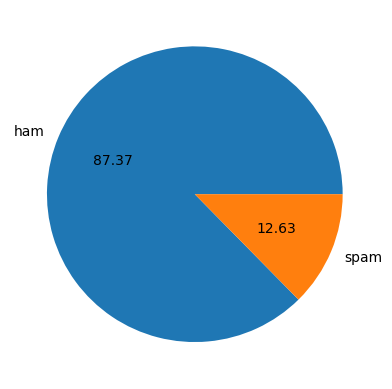

In [16]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
# using natural language tool kit library for creating columns containing no. of characters, words and sentences in the msg
import nltk

In [23]:
!pip install nltk

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.3 MB/s  0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [nltk]4/5 [nltk]]


In [24]:
nltk.download('punkt') 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pragatichauhan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
df.loc[:, 'characters'] = df['text'].apply(len)
# changes to original dataframe
df.head()

,target,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/pragatichauhan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
df.loc[:,'words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [21]:
df.loc[:,'sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['characters','words','sentences']].describe()

,characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# for ham msgs
df[df['target']==0][['characters','words','sentences']].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# for spam msgs
df[df['target']==1][['characters','words','sentences']].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='characters', ylabel='Count'>

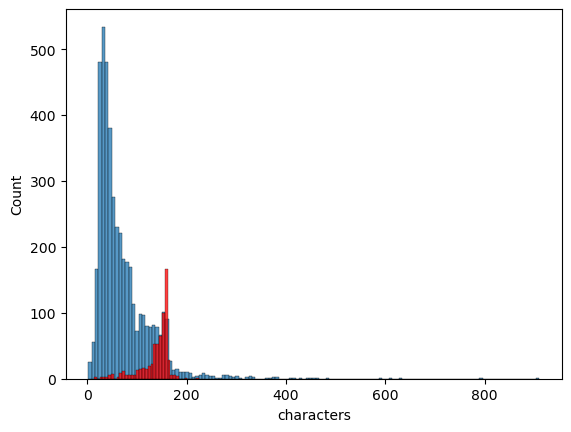

In [25]:
sns.histplot(df[df['target']==0]['characters'])
sns.histplot(df[df['target']==1]['characters'],color='red')

<Axes: xlabel='words', ylabel='Count'>

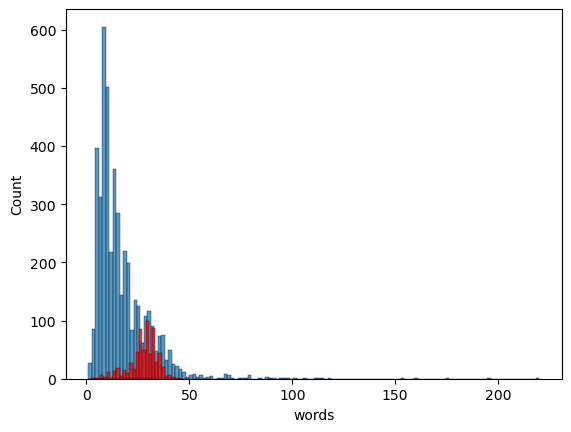

In [26]:
sns.histplot(df[df['target']==0]['words'])
sns.histplot(df[df['target']==1]['words'],color='red')

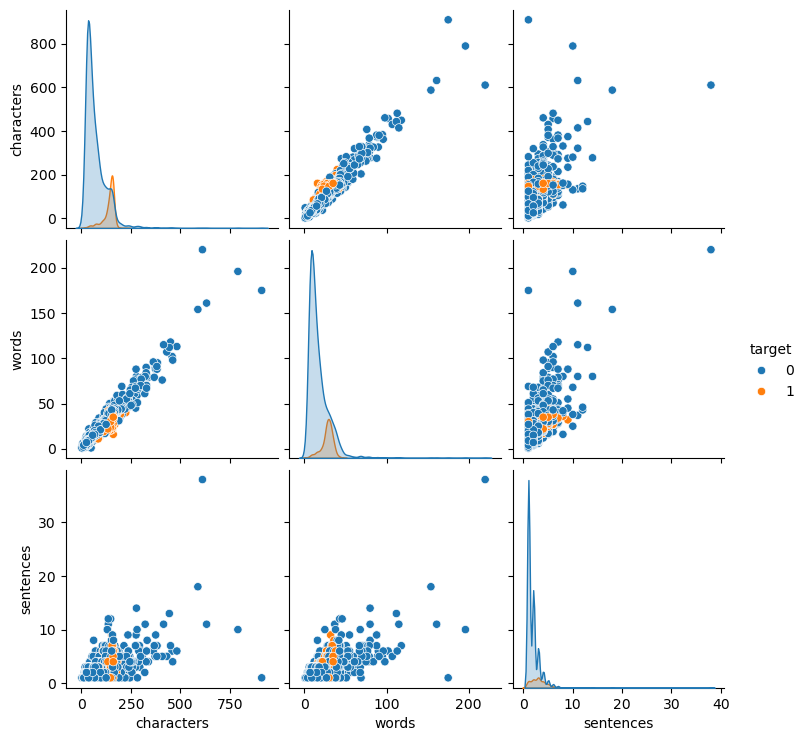

In [27]:
sns.pairplot(df,hue='target')

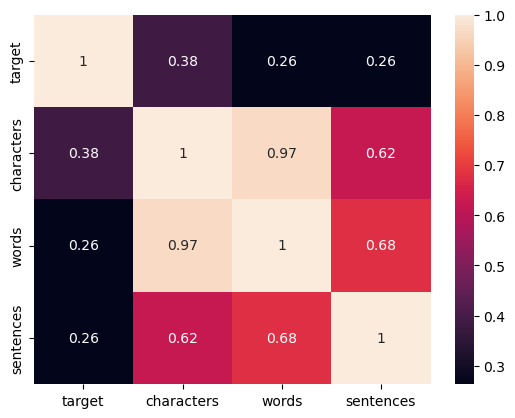

In [28]:
# correlation b/w numeric columns
sns.heatmap(df.drop(columns=['text']).corr(), annot=True)
plt.show()

<h2>Data Preprocessing</h2>
<ul>
    <li>Lower case --> convert</li>
    <li>Tokenization --> break into words</li>
    <li>Removing special characters</li>
    <li>Removing stop words and punctuation --> words do not contribute in meaning of the sentence like is, the, are, of etc.</li>
    <li>Stemming --> convert words of same meaning to one word like dance,danced,dancing all means dance</li>
</ul>

In [33]:
def transform_text(text):
    
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    
    # return y --> return list
    return " ".join(y)  # return string

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pragatichauhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords

In [35]:
import string

In [29]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [36]:
transform_text('Hi, who are YOU? I am a disco dancer dancing in the club')

'hi disco dancer danc club'

In [37]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [38]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
)

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [39]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [40]:
df.loc[:,'transformed_text']=df['text'].apply(transform_text)
df.head()

,target,text,characters,words,sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
import sys
!{sys.executable} -m pip install wordcloud

In [42]:
# generate word cloud images --> visual representations of text data 
# More frequent words appear larger, Less frequent words appear smaller

from wordcloud import WordCloud
wc=WordCloud(width=800, height=800,min_font_size=10,background_color='white')

In [43]:
spam = df[df['target'] == 1]['transformed_text'].str.cat(sep=' ')
spam_wc=wc.generate(spam)

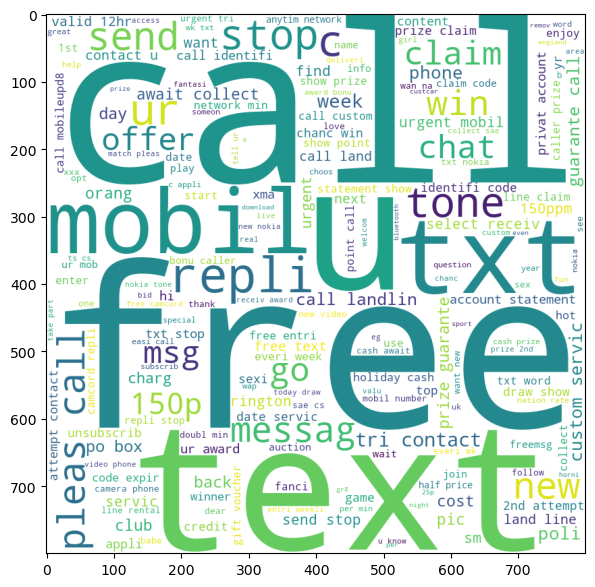

In [44]:
plt.figure(figsize=(14,7))
plt.imshow(spam_wc)

In [45]:
ham = df[df['target'] == 0]['transformed_text'].str.cat(sep=' ')
ham_wc=wc.generate(ham)

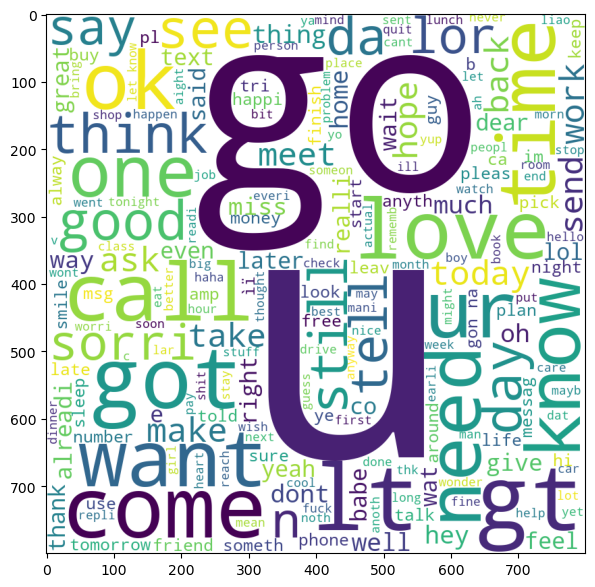

In [46]:
plt.figure(figsize=(14,7))
plt.imshow(ham_wc)

In [47]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [48]:
len(spam_corpus)

9939

In [49]:
from collections import Counter
top_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30))
top_spam_words.columns = ['word', 'count']

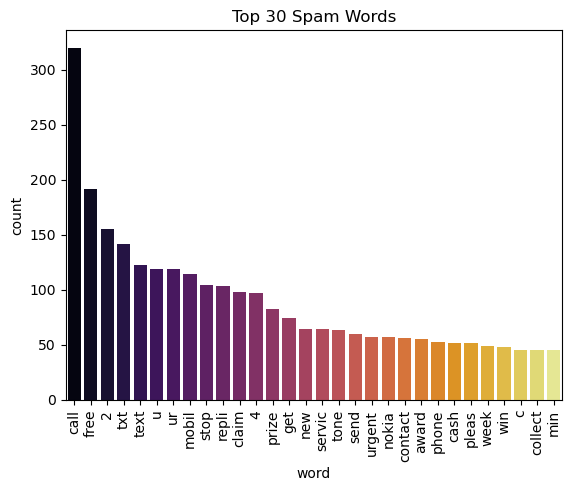

In [50]:
sns.barplot(x=top_spam_words['word'], y=top_spam_words['count'], hue=top_spam_words['word'], palette='inferno')
plt.xticks(rotation=90)
plt.title("Top 30 Spam Words")
plt.show()

In [51]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
from collections import Counter
top_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30))
top_ham_words.columns = ['word', 'count']

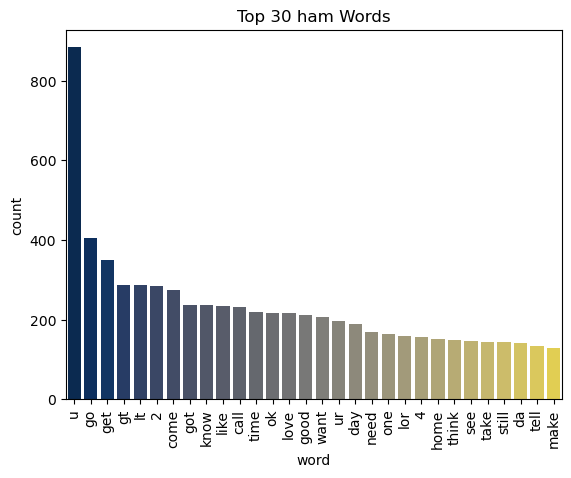

In [53]:
sns.barplot(x=top_ham_words['word'], y=top_ham_words['count'], hue=top_ham_words['word'], palette='cividis')
plt.xticks(rotation=90)
plt.title("Top 30 ham Words")
plt.show()

<h2>Model Building</h2>

In [158]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()  # term frequency-inverse document frequency

# used to convert text data into numerical features

In [159]:
# X=cv.fit_transform(df['transformed_text']).toarray()
X=tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 6708)

In [160]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [163]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [164]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [165]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)

In [166]:
print("For Gaussian NB:")
print("Accuracy score: ",accuracy_score(y_test,y_pred1))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred1))
print("Precision score: ",precision_score(y_test,y_pred1))

For Gaussian NB:
Accuracy score:  0.8762088974854932
Confusion matrix:
 [[793 103]
 [ 25 113]]
Precision score:  0.5231481481481481


In [167]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)

In [168]:
print("For Multinomial NB:")
print("Accuracy score: ",accuracy_score(y_test,y_pred2))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred2))
print("Precision score: ",precision_score(y_test,y_pred2))

For Multinomial NB:
Accuracy score:  0.9593810444874274
Confusion matrix:
 [[896   0]
 [ 42  96]]
Precision score:  1.0


In [148]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)

In [149]:
print("For Bernoulli NB:")
print("Accuracy score: ",accuracy_score(y_test,y_pred3))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred3))
print("Precision score: ",precision_score(y_test,y_pred3))

For Bernoulli NB:
Accuracy score:  0.9700193423597679
Confusion matrix:
 [[893   3]
 [ 28 110]]
Precision score:  0.9734513274336283


<h3>Training on more models</h3>

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [90]:
import sys
!{sys.executable} -m pip install xgboost

  Using cached xgboost-3.0.4-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.4-py3-none-macosx_12_0_arm64.whl (2.0 MB)


In [129]:
from xgboost import XGBClassifier

In [150]:
mnb=MultinomialNB()
lr=LogisticRegression(solver='liblinear',penalty='l1')
svc=SVC(kernel='sigmoid',gamma=1.0)
dtc=DecisionTreeClassifier(max_depth=5)
knc=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
xgb=XGBClassifier(n_estimators=50, random_state=2)

In [151]:
clfs = {
    'NB':mnb,
    'LR':lr,
    'SVC':svc,
    'DT':dtc,
    'KN':knc,
    'RF':rfc,
    'XGB':xgb
}

In [152]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,precision

In [153]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [154]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    curr_as,curr_ps=train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy: ", curr_as)
    print("Precision: ", curr_ps)

    accuracy_scores.append(curr_as)
    precision_scores.append(curr_ps)

For  NB
Accuracy:  0.9593810444874274
Precision:  1.0
For  LR
Accuracy:  0.9516441005802708
Precision:  0.94
For  SVC
Accuracy:  0.9729206963249516
Precision:  0.9741379310344828
For  DT
Accuracy:  0.9352030947775629
Precision:  0.8380952380952381
For  KN
Accuracy:  0.9003868471953579
Precision:  1.0
For  RF
Accuracy:  0.971953578336557
Precision:  1.0
For  XGB
Accuracy:  0.9748549323017408
Precision:  0.9516129032258065


In [155]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [156]:
performance_df

,Algorithm,Accuracy,Precision
0,NB,0.959381,1.000000
4,KN,0.900387,1.000000
5,RF,0.971954,1.000000
2,SVC,0.972921,0.974138
6,XGB,0.974855,0.951613
1,LR,0.951644,0.940000
3,DT,0.935203,0.838095


<h2>Improve Performance of Model</h2>

<p>1. Change max features of tfidf to 3000 <br>&nbsp;&nbsp;&nbsp;--> this will increase accuracy of naive bayes algorithm <br>
    2. Apply MinMaxScaler to X (did not use std scaler as it will give -ve values which NB don't accept) <br>
&nbsp;&nbsp;&nbsp;--> reduced precision of NB while accuracy has slightly increased <br>
    3. Creating voting classifier on the best performing algorithms  <br>
&nbsp;&nbsp;&nbsp;  --> accuracy increased, precision reduced <br>
    4. Applying stacking <br>
&nbsp;&nbsp;&nbsp;--> accuracy increased, precision reduced more than voting classifier </p>

In [157]:
# In our case kisi method se bhi performance aur zyada improve nahi ho rahi hai
# so we have chosen multinomail NB as it is performing best

In [169]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))